In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pos = user of a council service
neg = average review of product 
stat = time taken to change wheel of F1 car
plat = advert engagement

seas1 = transport users
seas2 = winter hiking gear

In [3]:
import numpy as np

In [10]:
date1 = []
value1 = []
val = np.random.normal(150, 10)
start_date = pd.to_datetime('01/01/2023', format = '%d/%m/%Y')
n = 250

while start_date < pd.to_datetime('02/01/2023', format = '%d/%m/%Y'):
    date1.append(start_date)
    
    value1.append(val)
    val = val * np.random.normal(2, 0.05)
    
    start_date = start_date + datetime.timedelta(hours=1)

Text(0.5, 1.0, 'Bacteria Growth')

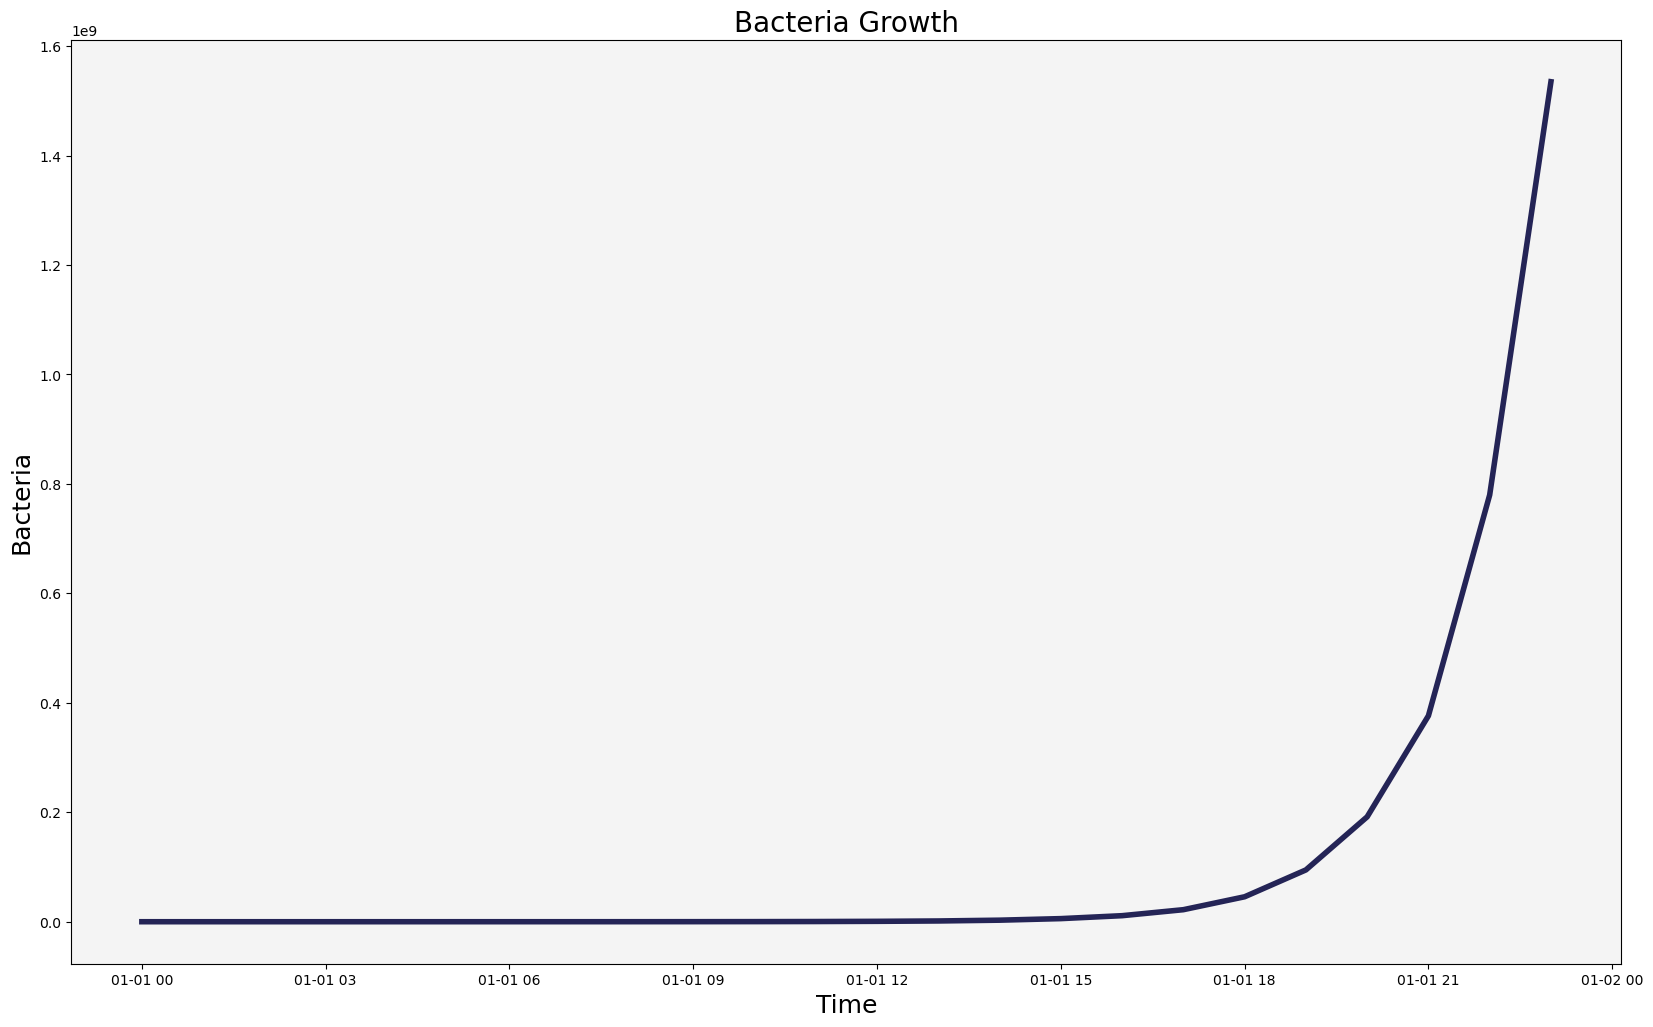

In [12]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date1, y = value1, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Bacteria', fontsize = 18)
ax.set_title('Bacteria Growth', fontsize = 20)

In [2]:
date1 = []
value1 = []

start_date = pd.to_datetime('01/07/2023', format = '%d/%m/%Y')
n = 100

while start_date < pd.to_datetime('01/10/2023', format = '%d/%m/%Y'):
    date1.append(start_date)
    value1.append(random.randint(n-20, n + 20))
    
    n += random.randint(-15, 20)
    start_date = start_date + datetime.timedelta(days=1)

In [36]:
date2 = []
value2 = []

start_date = pd.to_datetime('05/04/2023', format = '%d/%m/%Y')
n = 87

while start_date < pd.to_datetime('01/07/2023', format = '%d/%m/%Y'):
    date2.append(start_date)
    value2.append(random.randint(n - 5, n + 8))
    
    n += random.randint(-3, 2)
    start_date = start_date + datetime.timedelta(days=1)

In [39]:
date3 = []
value3 = []

start_date = pd.to_datetime('01/01/2022', format = '%d/%m/%Y')
n = 55

while start_date < pd.to_datetime('01/01/2023', format = '%d/%m/%Y'):
    date3.append(start_date)
    value3.append(random.randint(n-10, n + 10))

    start_date = start_date + datetime.timedelta(days=1)

In [45]:
date4 = []
value4 = []

start_date = pd.to_datetime('01/10/2023', format = '%d/%m/%Y')
n = 1000

while start_date < pd.to_datetime('31/10/2023', format = '%d/%m/%Y'):
    if start_date < pd.to_datetime('16/10/2023', format = '%d/%m/%Y'):
        date4.append(start_date)
        value4.append(random.randint(n-5, n + 200))

        n += random.randint(-10, 259)
    else:
        date4.append(start_date)
        value4.append(random.randint(n-100, n + 78))
    start_date = start_date + datetime.timedelta(days=1)

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [4]:
df = pd.DataFrame({'Date' : date1, 'Users' : value1}).set_index('Date')

In [18]:
model = ETSModel(df.Users,  seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

C:\Users\alastair.tyson\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
n_steps_prediction = df.Users.shape[0]
n_repetitions = 31

In [21]:
df_simul = fitted.simulate(
    nsimulations=n_steps_prediction,
    repetitions=n_repetitions,
    anchor='start',
)

In [14]:
sales_forecast = fitted.forecast(steps=31)

In [25]:
upper_ci = df_simul.quantile(q=0.9, axis='columns')
lower_ci = df_simul.quantile(q=0.1, axis='columns')

In [26]:
upper_ci

2023-07-01    110.025252
2023-07-02    115.942754
2023-07-03    118.469142
2023-07-04    122.941081
2023-07-05    131.779294
                 ...    
2023-09-26    424.926132
2023-09-27    439.482326
2023-09-28    434.861675
2023-09-29    430.576842
2023-09-30    440.539835
Freq: D, Name: 0.9, Length: 92, dtype: float64

In [30]:
import datetime

In [41]:
ci = fitted.get_prediction(start =  df.index[-2], end = df.index[-1] + datetime.timedelta(days=31))
preds = ci.pred_int(alpha = .05) #confidence interval
limits = ci.predicted_mean

preds = pd.concat([limits, preds], axis = 1)
preds.columns = ['yhat', 'yhat_lower', 'yhat_upper']
preds

,yhat,yhat_lower,yhat_upper
2023-09-29,329.400794,296.595741,365.383511
2023-09-30,339.754886,306.111545,375.441002
2023-10-01,337.011818,305.408440,373.149470
2023-10-02,327.195443,292.157619,366.102542
2023-10-03,336.661642,293.842945,377.976824
2023-10-04,339.322494,297.707295,382.709794
2023-10-05,353.472166,307.109637,402.730692
2023-10-06,348.869003,296.945778,396.369512
2023-10-07,355.184697,303.210376,408.757931
2023-10-08,356.163367,300.481362,409.803917


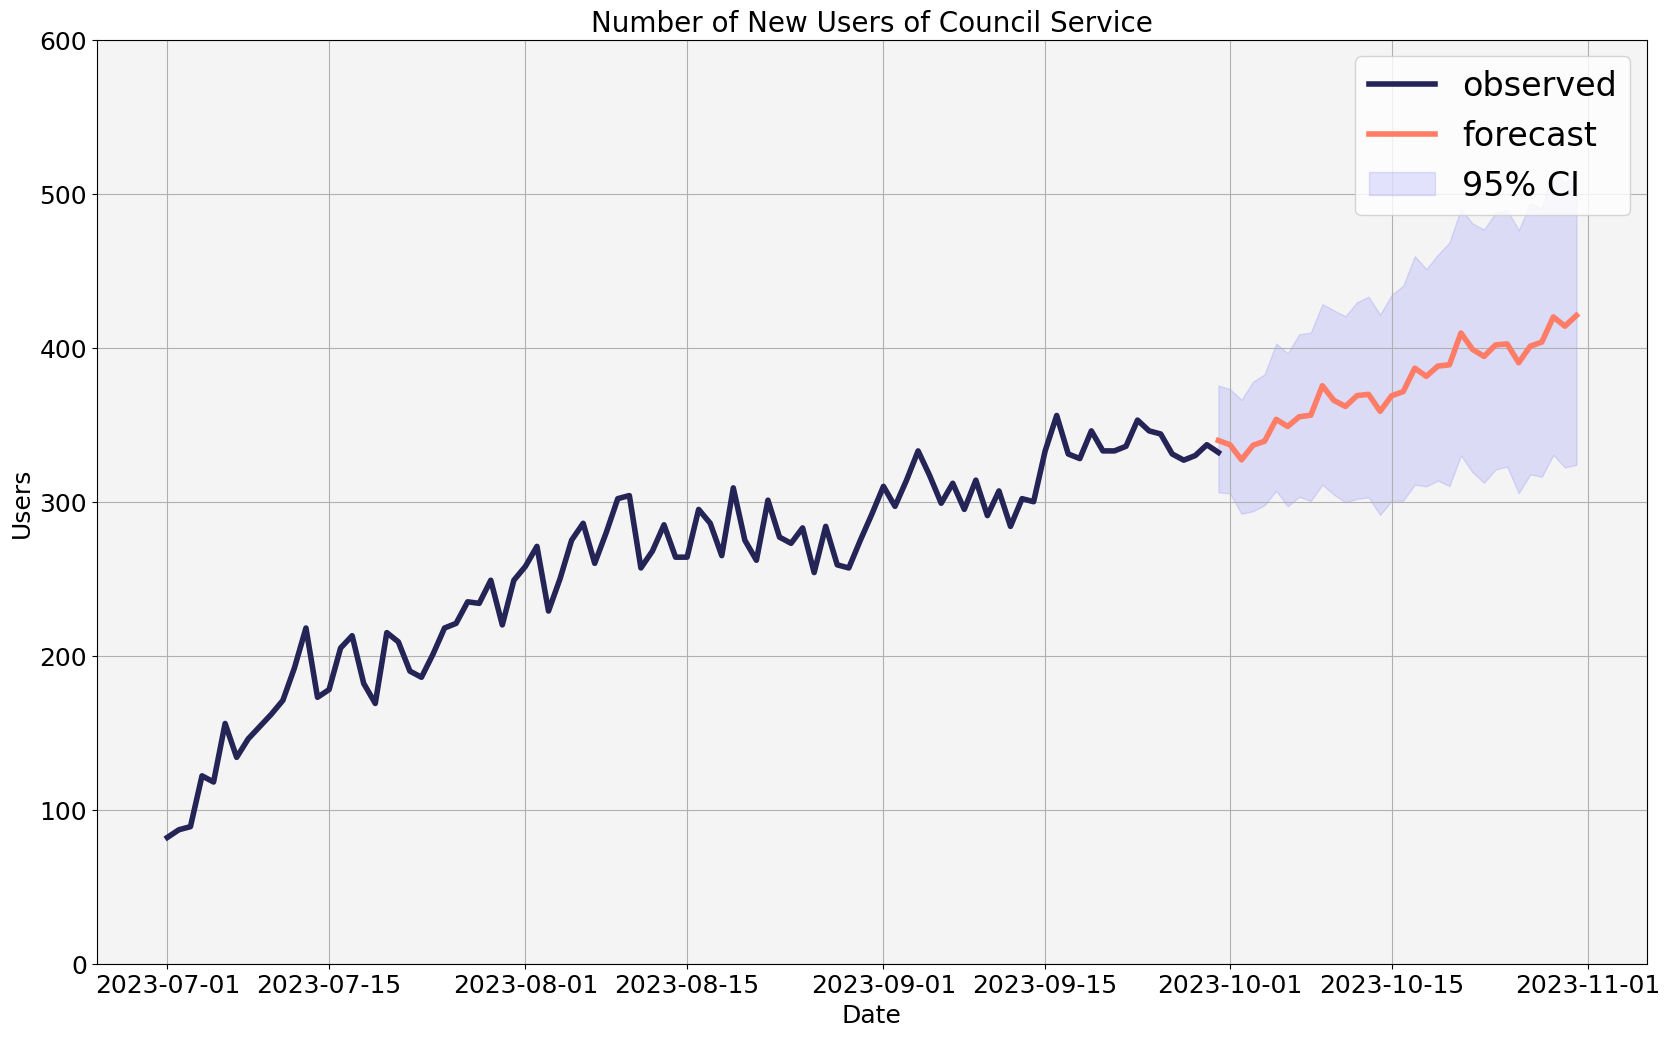

In [44]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date1, y = value1, color = '#242456', linewidth= 4, label = 'observed')
sns.lineplot(x = preds.index[1:], y = preds.yhat[1:], color = '#ff7c66', linewidth= 4, label = 'forecast')
ax.fill_between(preds.index[1:], preds.yhat_lower[1:], preds.yhat_upper[1:], color='blue', alpha=0.1, label = '95% CI')
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Number of New Users of Council Service', fontsize = 20)
ax.legend(fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim([0, 600])
plt.grid()

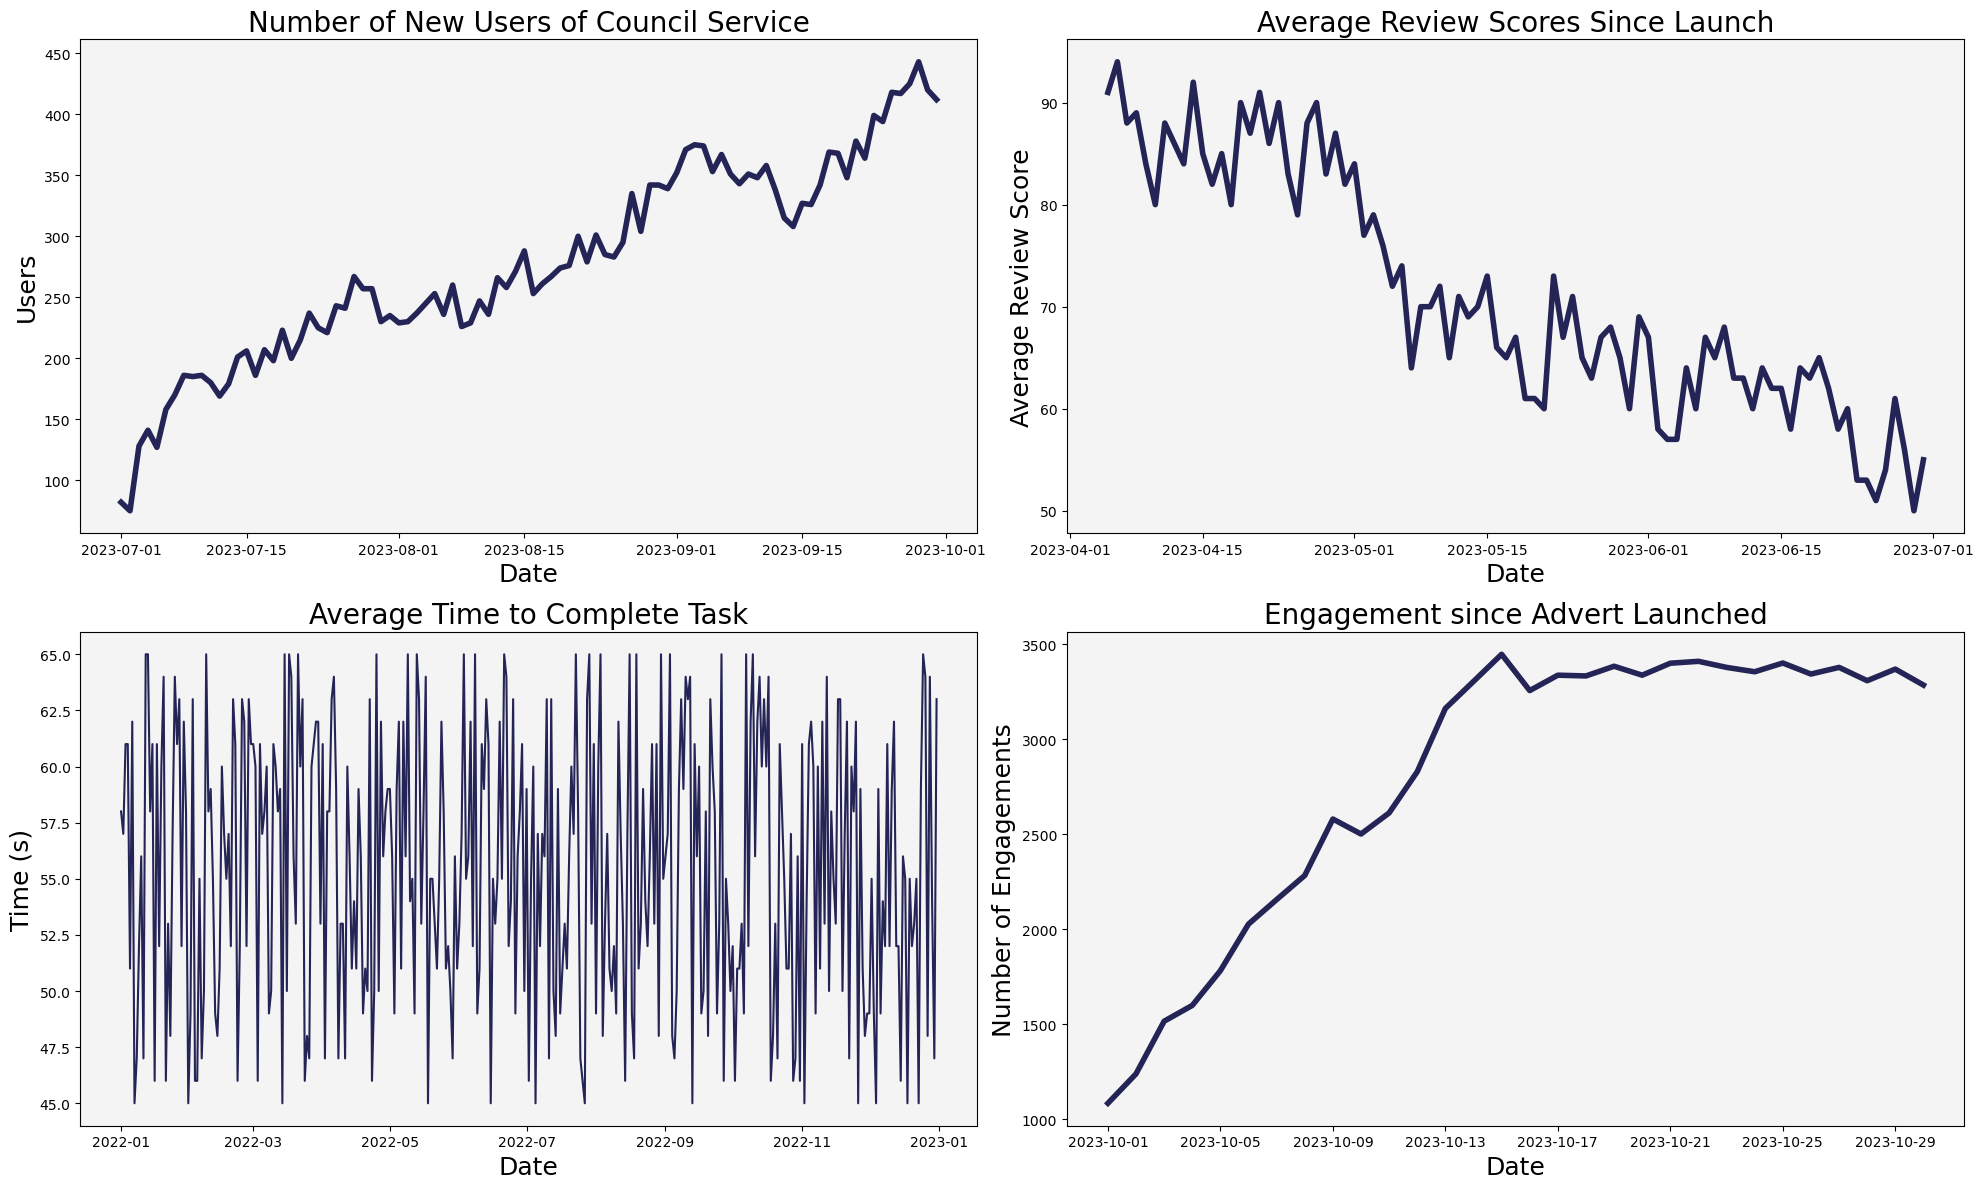

In [68]:
fig, ax = plt.subplots(figsize = (20, 12), ncols = 2, nrows = 2)
sns.lineplot(x = date1, y = value1, color = '#242456', ax = ax[0,0], linewidth= 4)
ax[0,0].set_facecolor('#f4f4f4')
ax[0,0].set_xlabel('Date', fontsize = 18)
ax[0,0].set_ylabel('Users', fontsize = 18)
ax[0,0].set_title('Number of New Users of Council Service', fontsize = 20)

sns.lineplot(x = date2, y = value2, color = '#242456', ax = ax[0,1], linewidth= 4)
ax[0,1].set_facecolor('#f4f4f4')
ax[0,1].set_xlabel('Date', fontsize = 18)
ax[0,1].set_ylabel('Average Review Score', fontsize = 18)
ax[0,1].set_title('Average Review Scores Since Launch', fontsize = 20)

sns.lineplot(x = date3, y = value3, color = '#242456', ax = ax[1,0])
ax[1,0].set_facecolor('#f4f4f4')
ax[1,0].set_xlabel('Date', fontsize = 18)
ax[1,0].set_ylabel('Time (s)', fontsize = 18)
ax[1,0].set_title('Average Time to Complete Task', fontsize = 20)

sns.lineplot(x = date4, y = value4, color = '#242456', ax = ax[1,1], linewidth= 4)
ax[1,1].set_facecolor('#f4f4f4')
ax[1,1].set_xlabel('Date', fontsize = 18)
ax[1,1].set_ylabel('Number of Engagements', fontsize = 18)
ax[1,1].set_title('Engagement since Advert Launched', fontsize = 20)
plt.tight_layout()
plt.show()

In [6]:
date5 = []
value5 = []

start_date = pd.to_datetime('01/08/2023 00:00:00', format = '%d/%m/%Y %H:%M:%S')


while start_date < pd.to_datetime('04/08/2023', format = '%d/%m/%Y'):
    if start_date.hour < 6:
        
        date5.append(start_date)
        value5.append(random.randint(1000, 1200))
    elif start_date.hour < 10:
        date5.append(start_date)
        value5.append(random.randint(10000, 18000))
    elif start_date.hour < 15:
        date5.append(start_date)
        value5.append(random.randint(8000, 12000))
    elif start_date.hour < 19:
        date5.append(start_date)
        value5.append(random.randint(10000, 18000))
    elif start_date.hour < 22:
        date5.append(start_date)
        value5.append(random.randint(2000, 6000))
    else:
        date5.append(start_date)
        value5.append(random.randint(1000, 1200))

      
  
    start_date = start_date + datetime.timedelta(hours=1)

In [10]:
date6 = []
value6 = []
year = {2021:1, 2022: 1.2, 2023:1.5}
start_date = pd.to_datetime('01/02/2021', format = '%d/%m/%Y')


while start_date < pd.to_datetime('01/01/2024', format = '%d/%m/%Y'):
    if start_date.month == 1:
        date6.append(start_date)
        value6.append(random.randint(10000, 15000) * random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    elif start_date.month == 2:
        date6.append(start_date)
        value6.append(random.randint(6000, 8000)* random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    elif start_date.month < 10:
        date6.append(start_date)
        value6.append(random.randint(1000, 3000)* random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    elif start_date.month == 10:
        date6.append(start_date)
        value6.append(random.randint(10000, 15000)* random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    elif start_date.month == 11:
        date6.append(start_date)
        value6.append(random.randint(20000, 35000)* random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    elif start_date.month == 12:
        date6.append(start_date)
        value6.append(random.randint(22000, 40000)* random.uniform(year[start_date.year] - 0.005,year[start_date.year] + 0.005))
    
      
  
    start_date = start_date + datetime.timedelta(days=1)

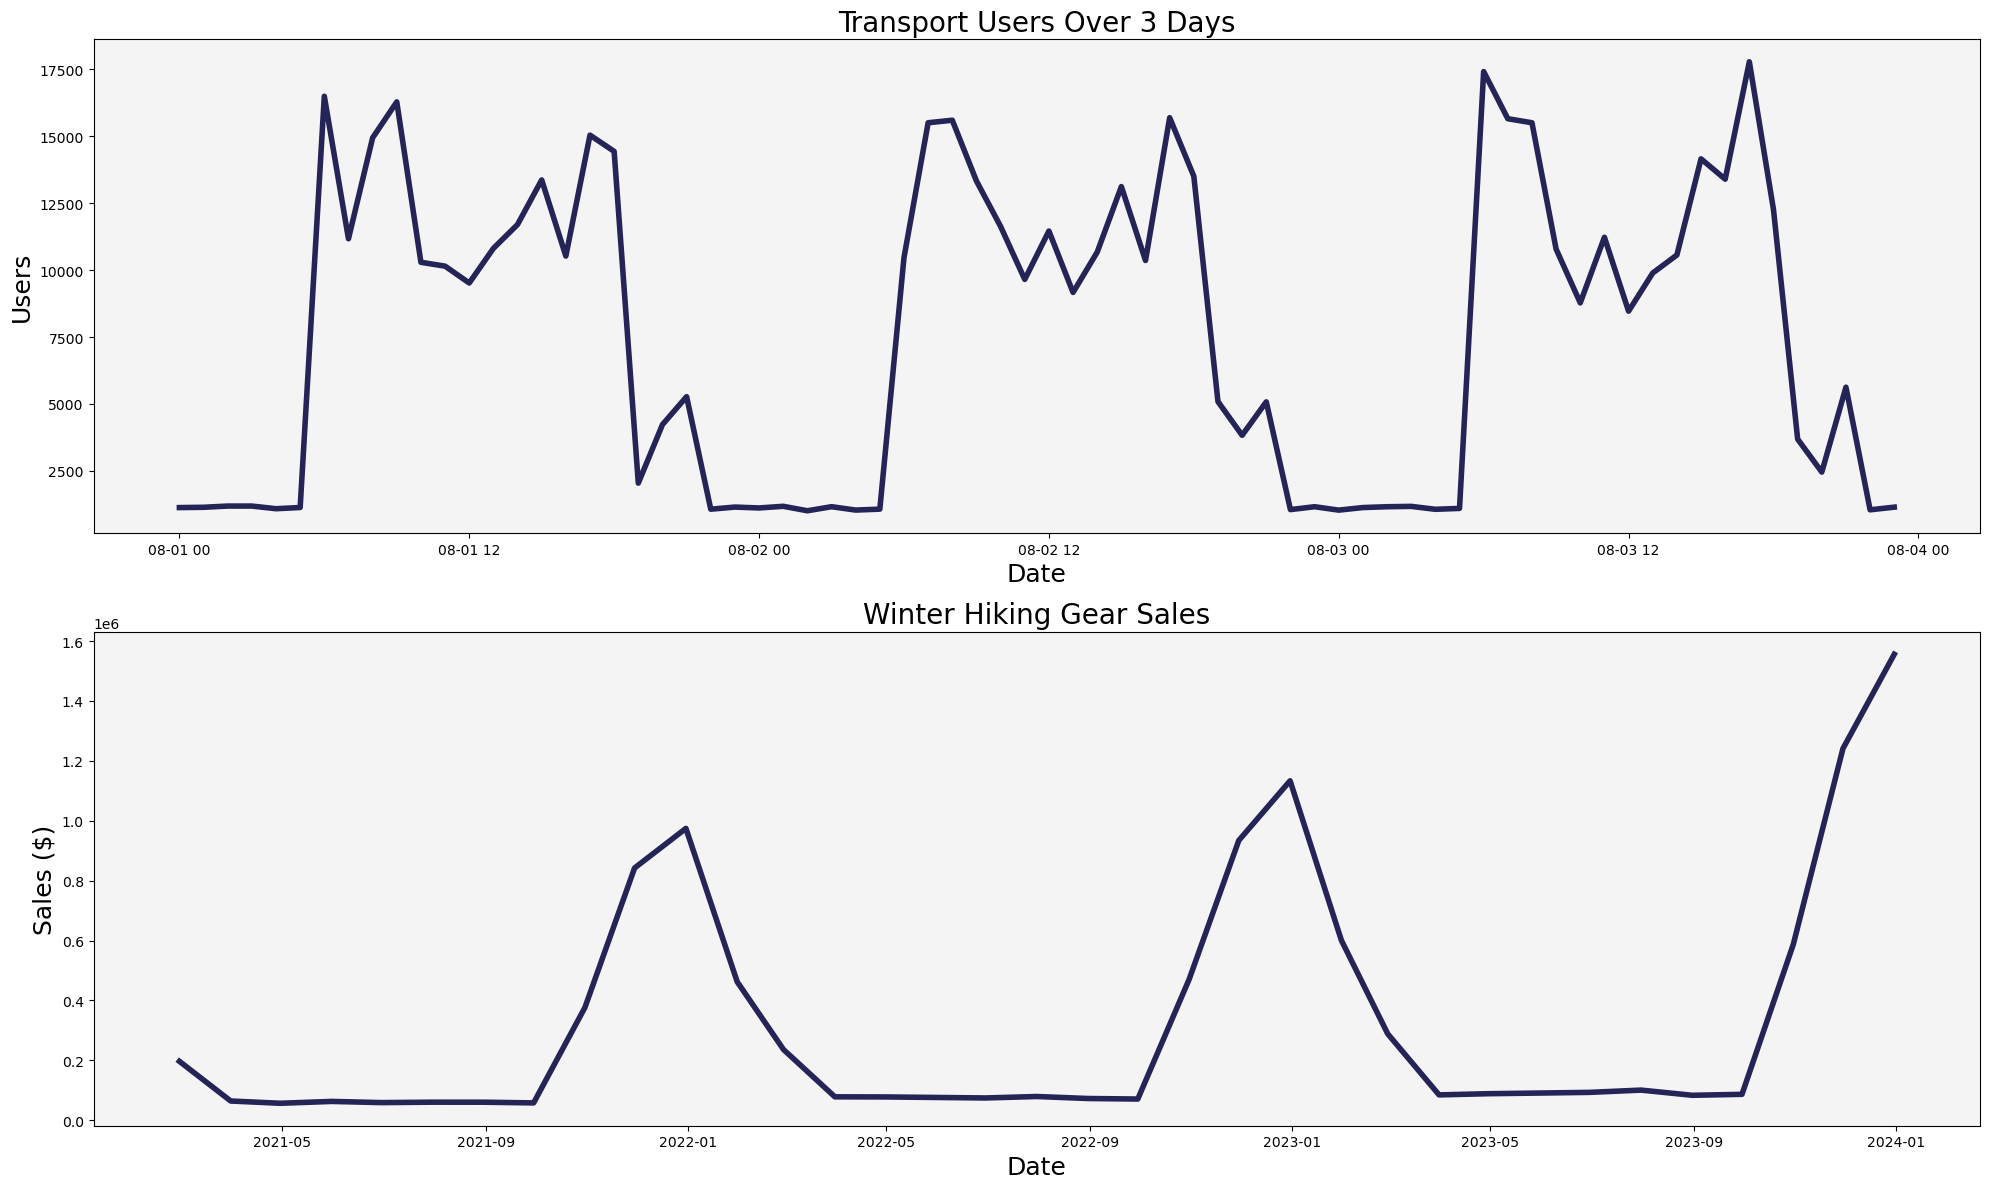

In [12]:
df = pd.DataFrame({'Date' : date6, 'Sales' : value6}).set_index('Date').resample('M').sum()

fig, ax = plt.subplots(figsize = (20, 12), nrows = 2)
sns.lineplot(x = date5, y = value5, color = '#242456', ax = ax[0], linewidth= 4)
ax[0].set_facecolor('#f4f4f4')
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Users', fontsize = 18)
ax[0].set_title('Transport Users Over 3 Days', fontsize = 20)

sns.lineplot(x = df.index, y = df.Sales, color = '#242456', ax = ax[1], linewidth= 4)
ax[1].set_facecolor('#f4f4f4')
ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Sales ($)', fontsize = 18)
ax[1].set_title('Winter Hiking Gear Sales', fontsize = 20)

plt.tight_layout()
plt.show()

In [22]:
date6 = []
value6 = []


start_date = pd.to_datetime('01/11/2023 09:00:00', format = '%d/%m/%Y %H:%M:%S')
n = 100

while start_date < pd.to_datetime('01/11/2023 15:00:00', format = '%d/%m/%Y %H:%M:%S'):
    date6.append(start_date)
    n = n * random.uniform(1, 1.01)
    value6.append(n)

      
  
    start_date = start_date + datetime.timedelta(minutes=1)

Text(0.5, 1.0, 'Hourly Users of Website Since Launch (first 6 hours)')

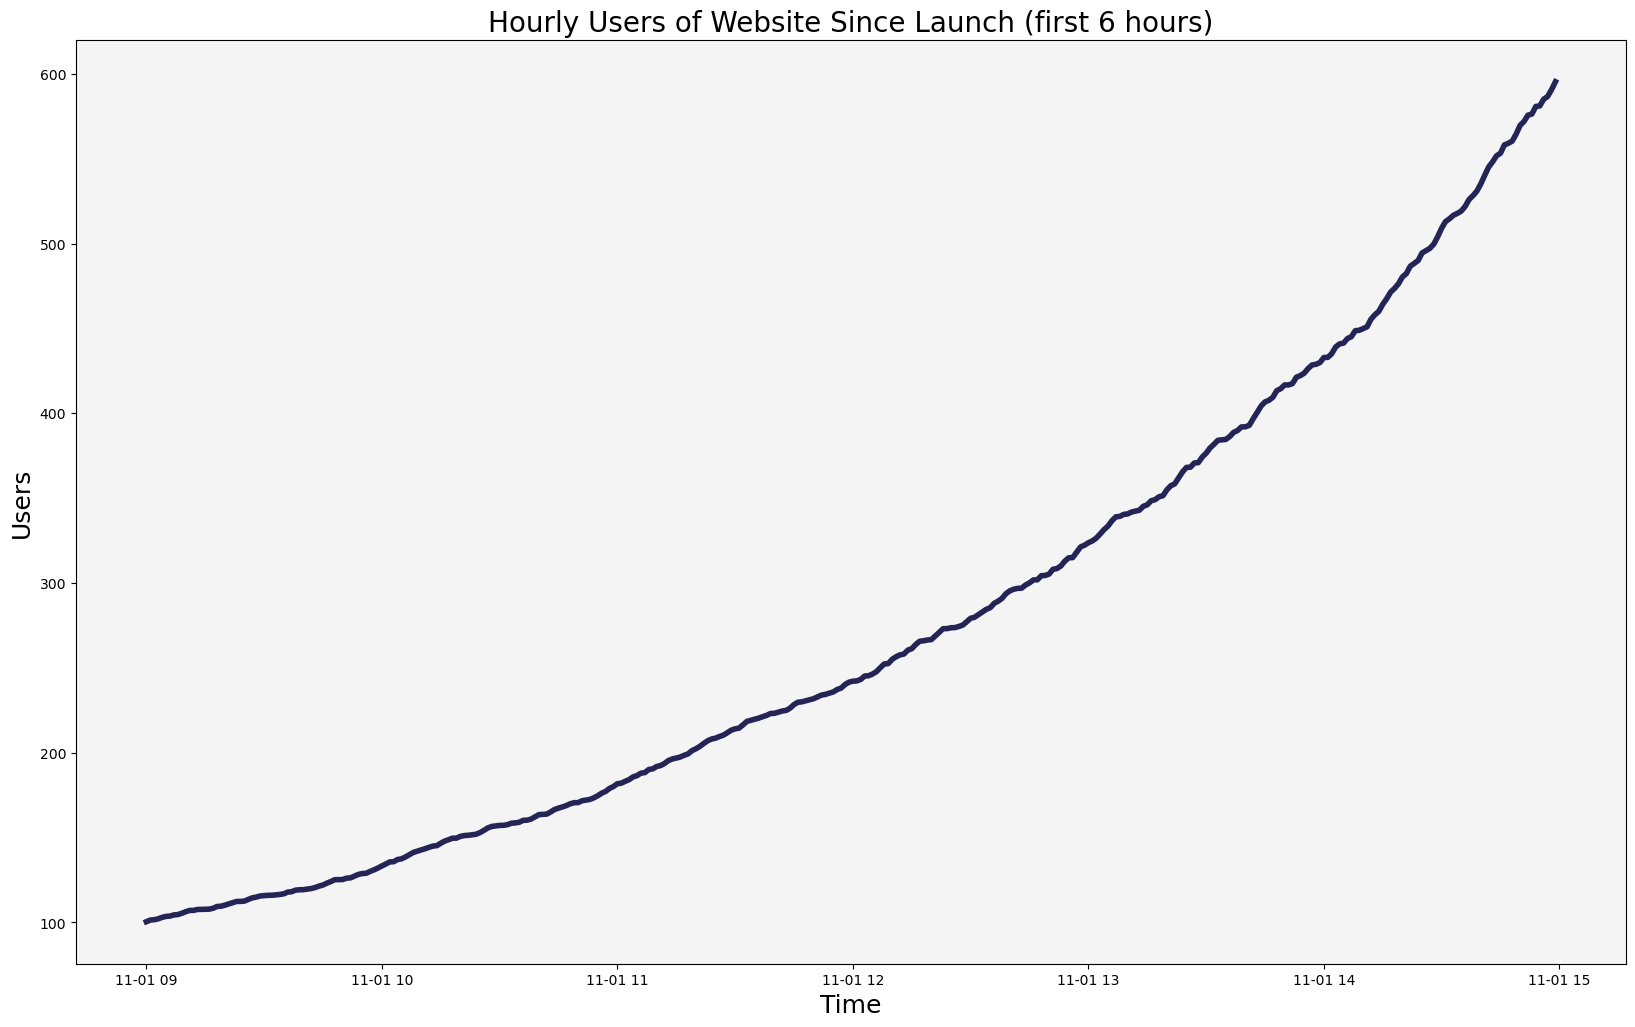

In [24]:
fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date6, y = value6, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Hourly Users of Website Since Launch (first 6 hours)', fontsize = 20)

In [26]:
date6 = []
value6 = []


start_date = pd.to_datetime('01/04/2023', format = '%d/%m/%Y')


while start_date < pd.to_datetime('01/12/2023', format = '%d/%m/%Y'):
    date6.append(start_date)
    value6.append(random.randint(25, 78))

      
  
    start_date = start_date + datetime.timedelta(days=1)

In [27]:
import numpy as nop

In [30]:
date5 = []
value5 = []


start_date = pd.to_datetime('03/12/2023 00:00:00', format = '%d/%m/%Y %H:%M:%S')


while start_date < pd.to_datetime('10/12/2023 00:00:00', format = '%d/%m/%Y %H:%M:%S'):
    date5.append(start_date)
    value = nop.random.normal(256, 50)
    value5.append(value)

      
  
    start_date = start_date + datetime.timedelta(hours=1)

In [36]:
df

,Sales
Date,
2023-04-02,103
2023-04-09,425
2023-04-16,319
2023-04-23,334
2023-04-30,386
2023-05-07,333
2023-05-14,414
2023-05-21,255
2023-05-28,324


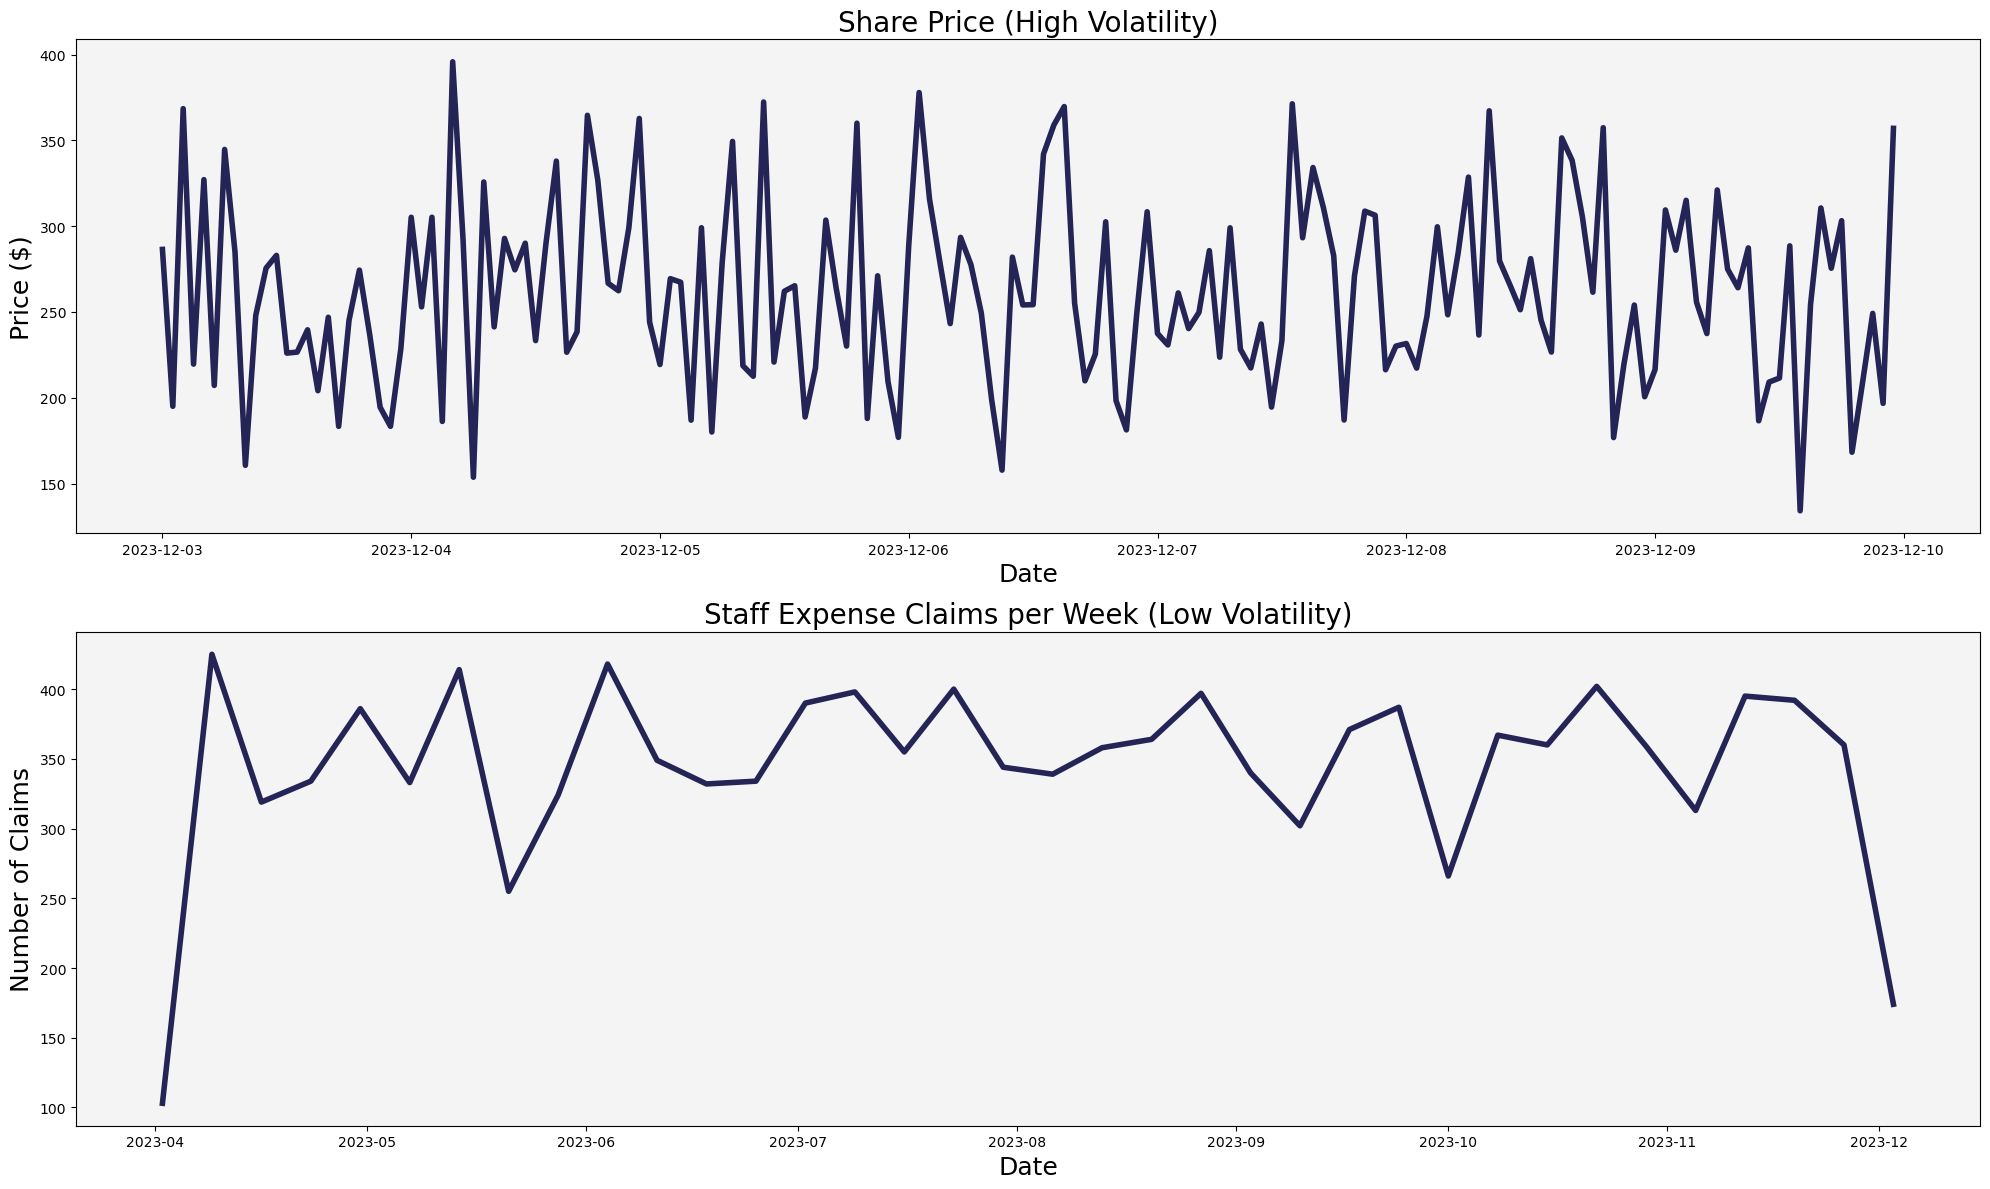

In [35]:
df = pd.DataFrame({'Date' : date6, 'Sales' : value6}).set_index('Date').resample('W').sum()


fig, ax = plt.subplots(figsize = (20, 12), nrows = 2)
sns.lineplot(x = date5, y = value5, color = '#242456', ax = ax[0], linewidth= 4)
ax[0].set_facecolor('#f4f4f4')
ax[0].set_xlabel('Date', fontsize = 18)
ax[0].set_ylabel('Price ($)', fontsize = 18)
ax[0].set_title('Share Price (High Volatility)', fontsize = 20)

sns.lineplot(x = df.index, y = df.Sales, color = '#242456', ax = ax[1], linewidth= 4)
ax[1].set_facecolor('#f4f4f4')
ax[1].set_xlabel('Date', fontsize = 18)
ax[1].set_ylabel('Number of Claims', fontsize = 18)
ax[1].set_title('Staff Expense Claims per Week (Low Volatility)', fontsize = 20)

plt.tight_layout()
plt.show()

1. upwards
2. downwards (with seasonality)
3. plateau
4. upwards with high volatility
5. stationary with low volatility

Upwards Trend: The number of monthly website visitors for an e-commerce platform has been steadily increasing over the past year.

Downwards Trend with Seasonality: The monthly sales of a retail store show a recurring pattern with a decrease during summer months and an increase during the holiday season.

Plateau Trend: The customer satisfaction score for a software product has remained relatively stable around 8 out of 10 for the past six months without significant improvements or declines.

Upwards Trend with High Volatility: The fluctuations in the stock price of a technology company show an overall upward trend but with frequent sharp spikes and drops.

Stationary Trend: The average daily temperature in a city remains relatively constant throughout the year, neither displaying significant increases nor decreases over time.

In [18]:
df

,Date,Visitors
0,2023-01-01,12009
1,2023-01-02,11985
2,2023-01-03,11979
3,2023-01-04,11988
4,2023-01-05,11996
...,...,...
360,2023-12-27,12774
361,2023-12-28,12771
362,2023-12-29,12775
363,2023-12-30,12787


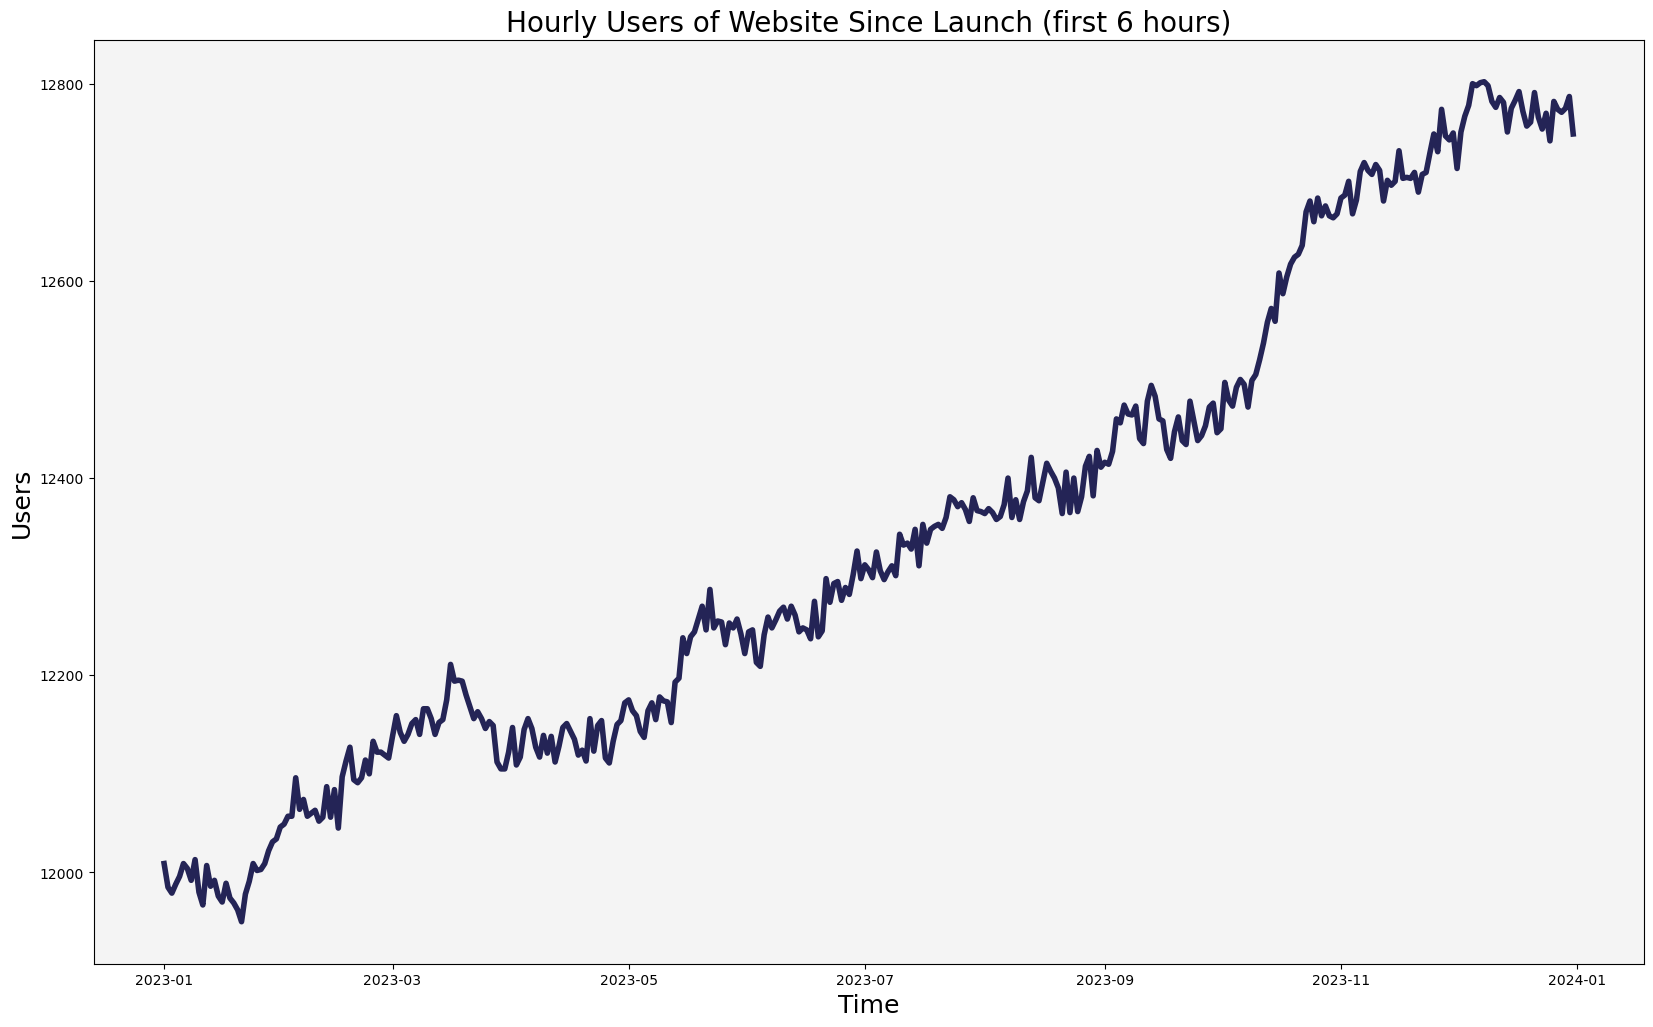

In [17]:
date6 = []
value6 = []


start_date = pd.to_datetime('01/01/2023', format = '%d/%m/%Y')
n = 12000

while start_date < pd.to_datetime('01/01/2024', format = '%d/%m/%Y'):
    date6.append(start_date)
    value6.append(random.randint(n-20, n + 20))
    
    n += random.randint(-15, 20)
    start_date = start_date + datetime.timedelta(days=1)

      
  


fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date6, y = value6, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Hourly Users of Website Since Launch (first 6 hours)', fontsize = 20)

df = pd.DataFrame({'Date' : date6, 'Visitors' : value6})
df.to_csv('ex1.csv')

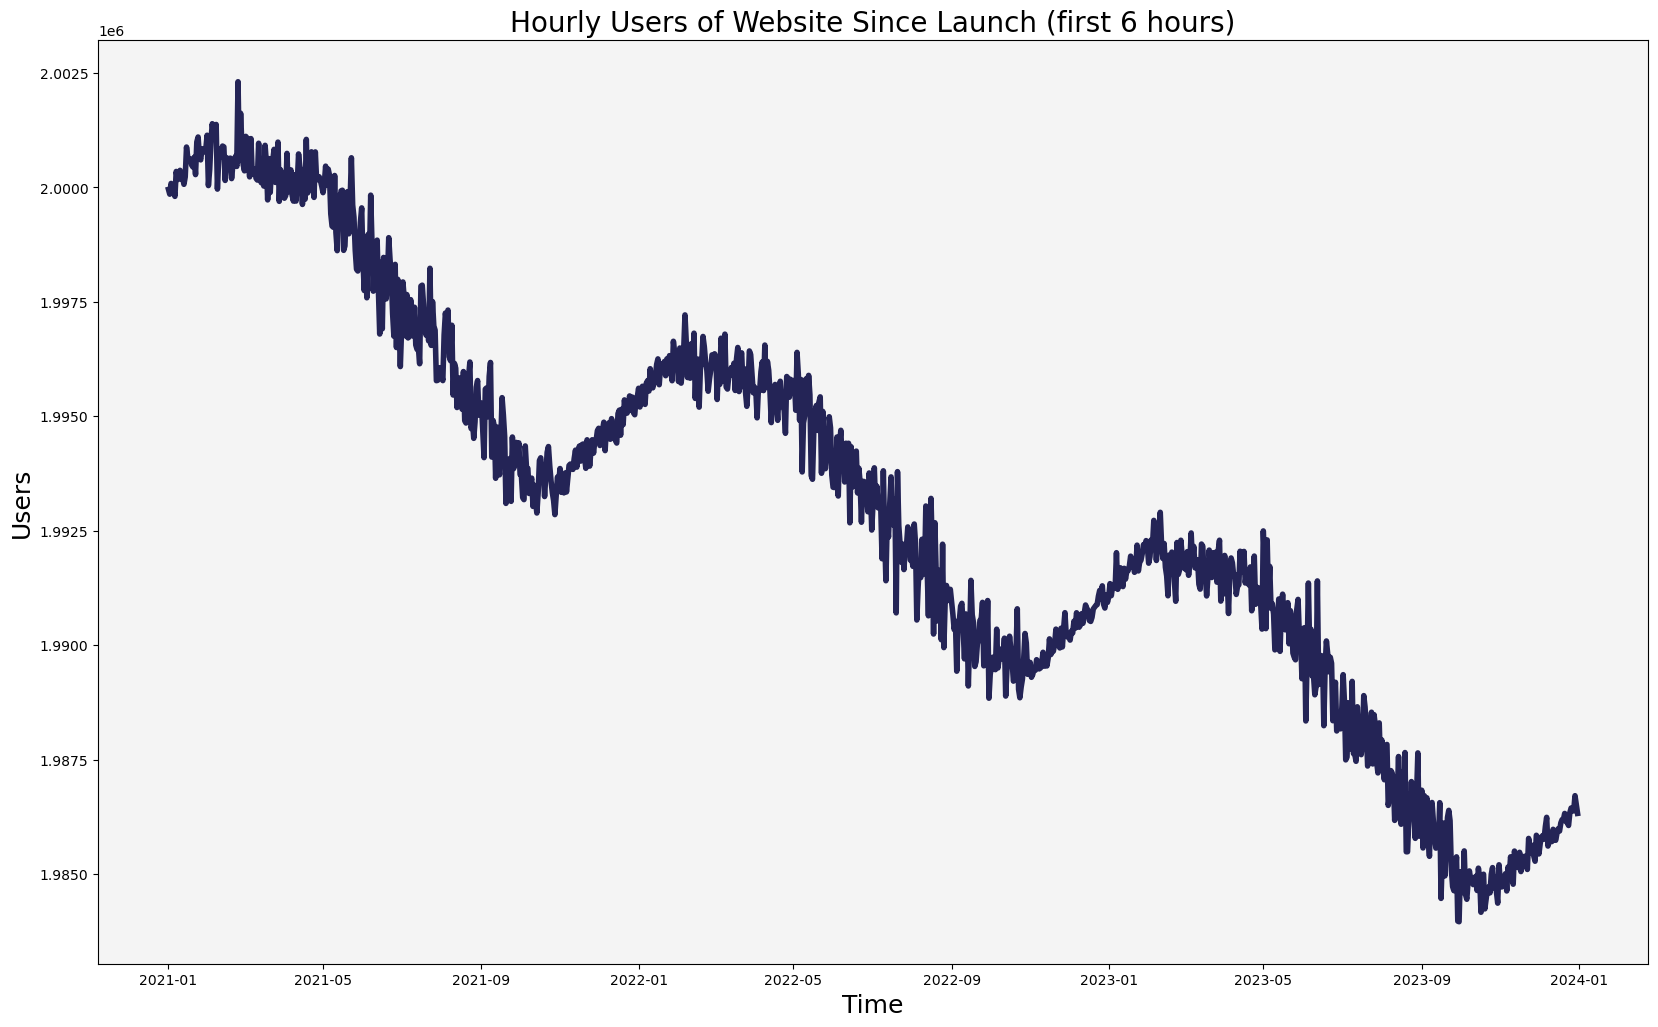

In [72]:
date6 = []
value6 = []


start_date = pd.to_datetime('01/01/2021', format = '%d/%m/%Y')
n = 2000000

while start_date < pd.to_datetime('01/01/2024', format = '%d/%m/%Y'):
    if start_date.month in [1,11,12]:
    
        date6.append(start_date)
        value6.append(nop.random.normal(n, 200))

        n += nop.random.normal(30, 10)
        start_date = start_date + datetime.timedelta(days=1)
    elif start_date.month in [5, 6, 7, 8, 9]:
        date6.append(start_date)
        value6.append(nop.random.normal(n, 600))

        n -= nop.random.normal(40, 10)
        start_date = start_date + datetime.timedelta(days=1)
    else:
        date6.append(start_date)
        value6.append(nop.random.normal(n, 400))

        n -= nop.random.normal(10, 1)
        start_date = start_date + datetime.timedelta(days=1)

    
fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date6, y = value6, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Hourly Users of Website Since Launch (first 6 hours)', fontsize = 20)

df = pd.DataFrame({'Date' : date6, 'Sales' : value6})
df.to_csv('ex2.csv')

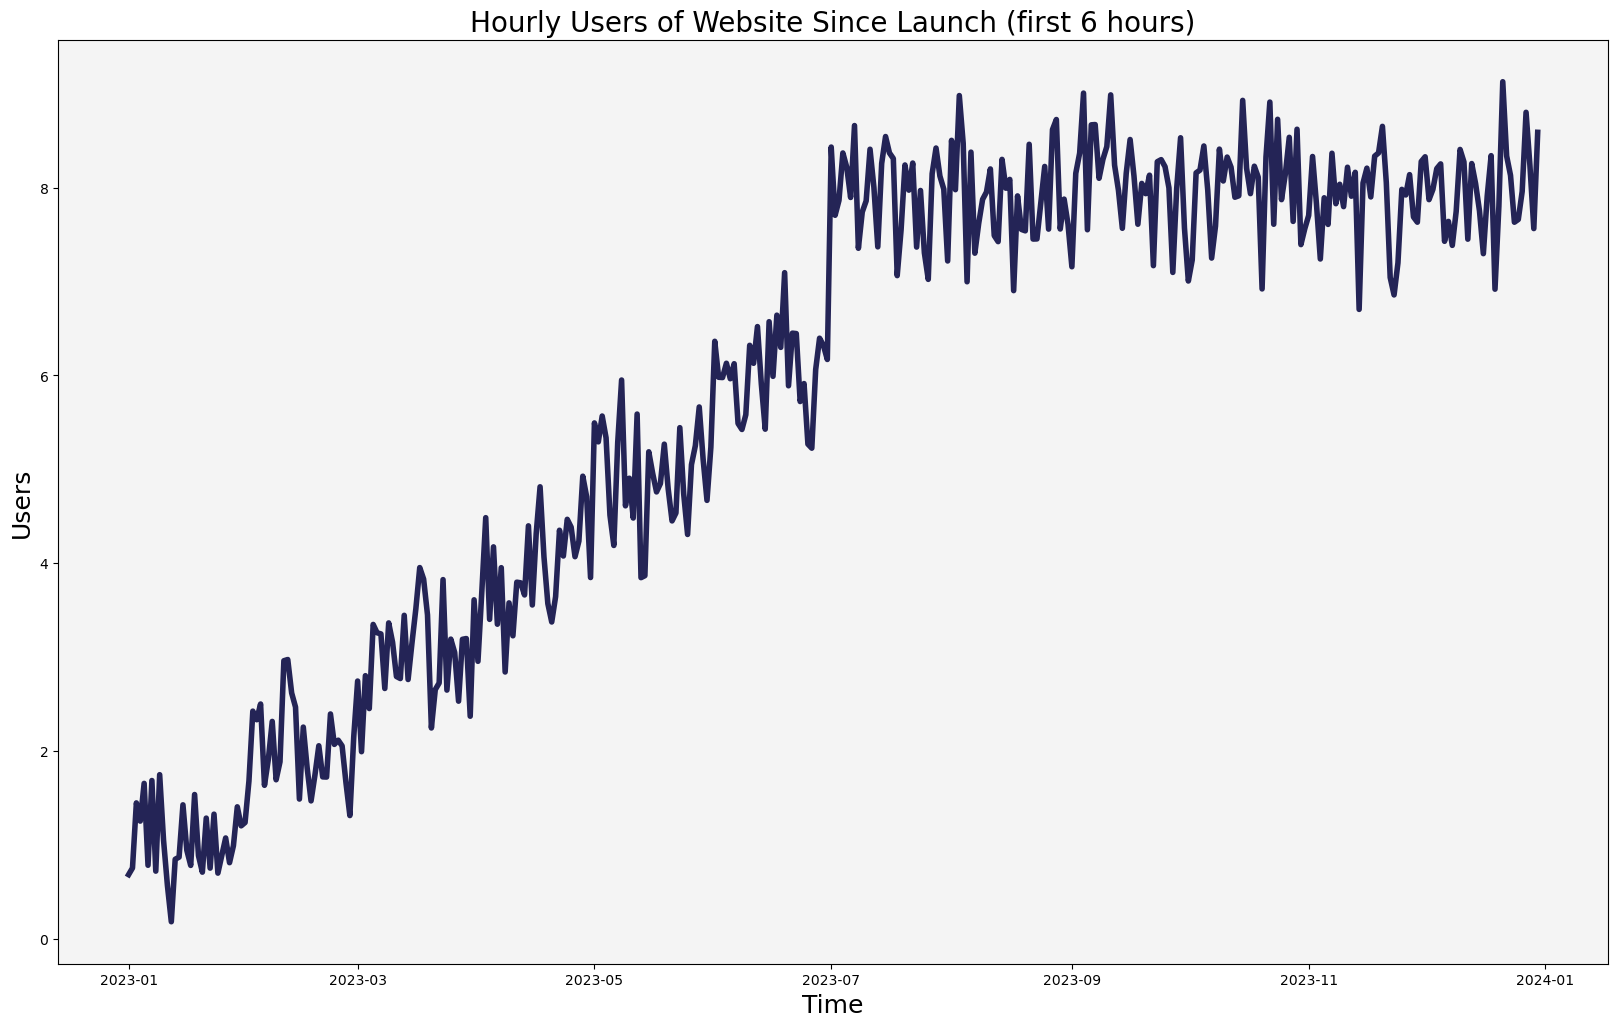

In [19]:
date6 = []
value6 = []


start_date = pd.to_datetime('01/01/2023', format = '%d/%m/%Y')

while start_date < pd.to_datetime('31/12/2023', format = '%d/%m/%Y'):
    if start_date.month < 7:
        date6.append(start_date)
        score = nop.random.normal(start_date.month, 0.5)
        if score < 0:
            score = 0
        value6.append(score)

        
        start_date = start_date + datetime.timedelta(days=1)
    else:
        date6.append(start_date)
        score = nop.random.normal(8, 0.5)
        if score > 10:
            score = 10
        value6.append(score)

        
        start_date = start_date + datetime.timedelta(days=1)

      
  


fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date6, y = value6, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Hourly Users of Website Since Launch (first 6 hours)', fontsize = 20)

df = pd.DataFrame({'Date' : date6, 'Review Score' : value6})
df.to_csv('ex3.csv')

Upwards Trend with High Volatility: The fluctuations in the stock price of a technology company show an overall upward trend but with frequent sharp spikes and drops.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

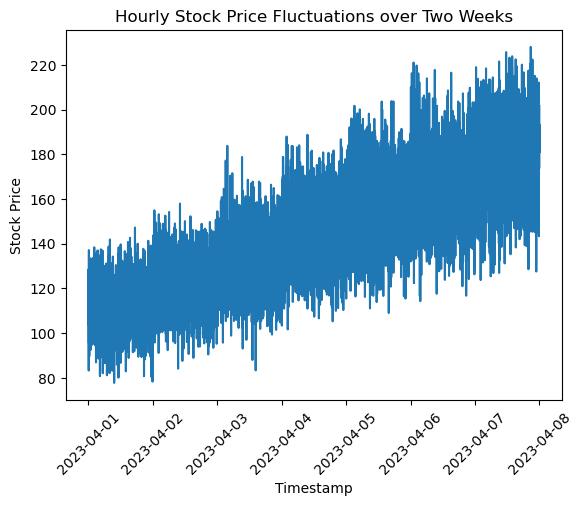

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating random hourly stock price data for a two-week period
np.random.seed(0)
day_no_ind = {}
ind = 1
for day in range(1, 15):
    if len(str(day)) == 1:
        day = '0' + str(day)
    ind += nop.random.normal(0.5, 0.1)
    day_no_ind[day] = ind

# Creating an array of hourly timestamps over two weeks
timestamps = []
hourly_prices = []
for day in range(1, 8):
    if len(str(day)) == 1:
        day = '0' + str(day)
    for hour in range(24):
        if len(str(hour)) == 1:
            hour = '0' + str(hour)
        for min in range(60):
            if len(str(min)) == 1:
                min = '0' + str(min)
            timestamps.append(pd.to_datetime(str(day) + '/04/2023 ' + str(hour) + ':' +str(min) + ':00', format = '%d/%m/%Y %H:%M:%S' ))
            hourly_prices.append( np.random.normal(100, 10, 24*7*60) * day_no_ind[day])


# Plotting the line chart
plt.plot(timestamps, hourly_prices)

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.title('Hourly Stock Price Fluctuations over Two Weeks')

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Displaying the chart
plt.show()
df = pd.DataFrame({'Date' : timestamps, 'Stock Price' : hourly_prices})
df.to_csv('ex4.csv')

In [96]:
df

,Date,Stock Price
0,2023-04-01 00:00:00,502.362236
1,2023-04-01 00:01:00,517.242662
2,2023-04-01 00:02:00,507.260521
3,2023-04-01 00:03:00,465.663477
4,2023-04-01 00:04:00,510.160924
...,...,...
10075,2023-04-07 23:55:00,543.536848
10076,2023-04-07 23:56:00,518.198390
10077,2023-04-07 23:57:00,478.839106
10078,2023-04-07 23:58:00,500.644634


Stationary Trend: The average daily temperature in a city remains relatively constant throughout the year, neither displaying significant increases nor decreases over time.

In [20]:
date6 = []
value6 = []
months = {1: 70, 2:70,3:66,4:63,5:57,6:52,7:50,8:52,9:55,10:59}

start_date = pd.to_datetime('01/01/2013', format = '%d/%m/%Y')

while start_date < pd.to_datetime('01/01/2024', format = '%d/%m/%Y'):

    date6.append(start_date)

    value6.append(nop.random.normal(months[start_date.month],5))


    start_date = start_date + datetime.timedelta(days=1)


      


fig, ax = plt.subplots(figsize = (20, 12))
sns.lineplot(x = date6, y = value6, color = '#242456', ax = ax, linewidth= 4)
ax.set_facecolor('#f4f4f4')
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Users', fontsize = 18)
ax.set_title('Hourly Users of Website Since Launch (first 6 hours)', fontsize = 20)

df = pd.DataFrame({'Date' : date6, 'Temperature' : value6})
df.to_csv('ex5.csv')

SyntaxError: invalid syntax (1701712123.py, line 8)